## Decision Trees
### Utilização das árvores de decisão para a escolha de um resultado

Utilizado neste projeto, a árvore resulta na escolha de comprar ou não um carro baseado em suas caracteristicas.

O trabalho pode ser modificado e utilizado para outros contextos com as devidas adaptações.

Inicialmente, importaremos as bibliotecas necessarias para tratar os dados.

In [10]:
import numpy as np
import pandas as pd
from sklearn import tree

Importando o arquivo .csv:

In [11]:
arquivo = "inputFile.csv"
df = pd.read_csv(arquivo, header = 0)

Apresentando o gráfico obtemos:
* preco = Preço do carro (mil reais)
* ano = Ano de fabricação
* km = Quilometragem rodada
* transmissao = Tipo de transmissão
* portas = Auto explicativo
* acidentes = Histórico de acidentes
* comprar = Decisão final

In [12]:
df.head()

,preco,ano,km,transmissao,portas,acidentes,comprar
0,21,2014,135,manual,4,Nao,Sim
1,65,2022,40,auto,4,Nao,Nao
2,30,2018,51,manual,2,Sim,Nao
3,18,2013,95,manual,4,Nao,Sim
4,17,2015,75,auto,4,Sim,Sim


In [13]:
d = {'Sim': 1, 'Nao': 0}
df['comprar'] = df['comprar'].map(d)
df['acidentes'] = df['acidentes'].map(d)
d = {'manual': 0, 'auto': 1}
df['transmissao'] = df['transmissao'].map(d)
df.head()

,preco,ano,km,transmissao,portas,acidentes,comprar
0,21,2014,135,0,4,0,1
1,65,2022,40,1,4,0,0
2,30,2018,51,0,2,1,0
3,18,2013,95,0,4,0,1
4,17,2015,75,1,4,1,1


Agora, separamos as colunas como features para utilizar na árvore de decisão.

In [14]:
features = list(df.columns[:6])
features

['preco', 'ano', 'km', 'transmissao', 'portas', 'acidentes']

Construindo a árvore:

In [15]:
y = df["comprar"]
x = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

Apresentando a árvore em formato de gráfico:

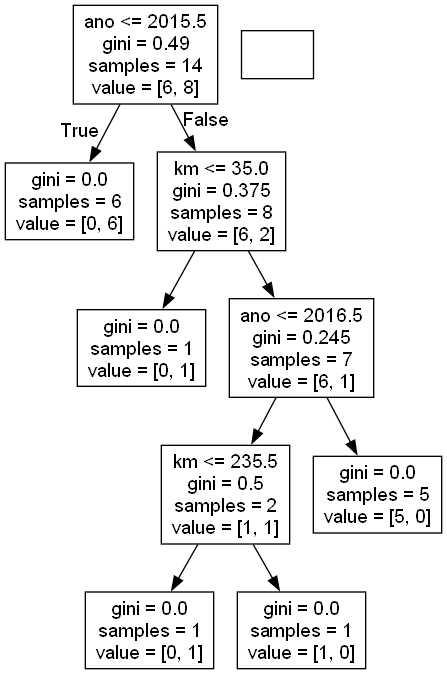

In [16]:
from IPython.display import Image  
from io import StringIO  
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Por fim, utilizaremos a árvore criada para gerar um modelo que prediz se o carro será ou não comprado.

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x, y)

new_data = pd.DataFrame([[19, 2014, 50, 1, 2, 0],      # Veiculo barato, quilometragem baixa, 2 portas e sem acidentes
                         [42, 2018, 120, 0, 4, 1]],    # Veiculo caro, quilometragem média, 4 portas e com acidentes
                         columns=features)
print(clf.predict(new_data.iloc[0:1, :]))
print(clf.predict(new_data.iloc[1:2, :]))

[1]
[1]
